# 1. Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("data.csv")
df_genres = pd.read_csv('data_by_genres.csv')
df_w_genres = pd.read_csv('data_w_genres.csv', na_values = ['[]'])
df_year   = pd.read_csv('data_by_year.csv')
df_artist = pd.read_csv('data_by_artist.csv')

In [4]:
# df.info()
# df_genres.info()
# df_w_genres.info() # col genres has Null value
# df_year.info()
# df_artist.info()

# 2. Data Preparation & Data Cleaning

In [5]:
# Cleaning the NA of the Artists and genres col.
df['artists'] = df['artists'].str.replace('[','',regex = True)
df['artists'] = df['artists'].str.replace(']','',regex = True)
df['artists'] = df['artists'].str.replace("'",'',regex = True)

df_w_genres['artists'] = df_w_genres['artists'].str.replace("'",'',regex = True)

df_w_genres['genres'] = df_w_genres['genres'].fillna('Unknown')
df_w_genres['genres'] = df_w_genres['genres'].str.replace('[','',regex = True)
df_w_genres['genres'] = df_w_genres['genres'].str.replace(']','',regex = True)
df_w_genres['genres'] = df_w_genres['genres'].str.replace("'",'',regex = True)

In [6]:
#Join the Genre to Artisted
df = pd.merge(left = df, right = df_w_genres[['artists','genres']], how = 'left', on = 'artists')

In [7]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Unknown
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,NaN
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Unknown
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,"tango, vintage tango"
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,NaN


In [8]:
#Mapping the categorical Value to the name.
df['genres'] = df_w_genres['genres'].fillna('Unknown')

# Change key number to symbols for more understanding
# keys={0:'C',1:'C#',2:'D','3':'D#',4:'E',5:'F',6:'F#',7:'G',8:'G#',9:'A',10:'A#',11:'B'}
# df['keys'] = df['key'].map(keys)

# Change millisecond to minutes
df['duration']= (df['duration_ms']/1000)/60
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,duration
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,show tunes,2.644133
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Unknown,4.702217
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Unknown,1.738333
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Unknown,3.012667
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Unknown,11.462217


In [9]:
# From the Variable Definition. We found that The music speciness is between 0-0.66 so We have to filter out data those are not song.

df.query("speechiness<=0.66",inplace=True)

# Filter the outlier of Loundness
df.query("loudness<=0",inplace=True)

# 3. Data Exploration & Data Analysis

### 1. Find audio characteristics 1920-2020

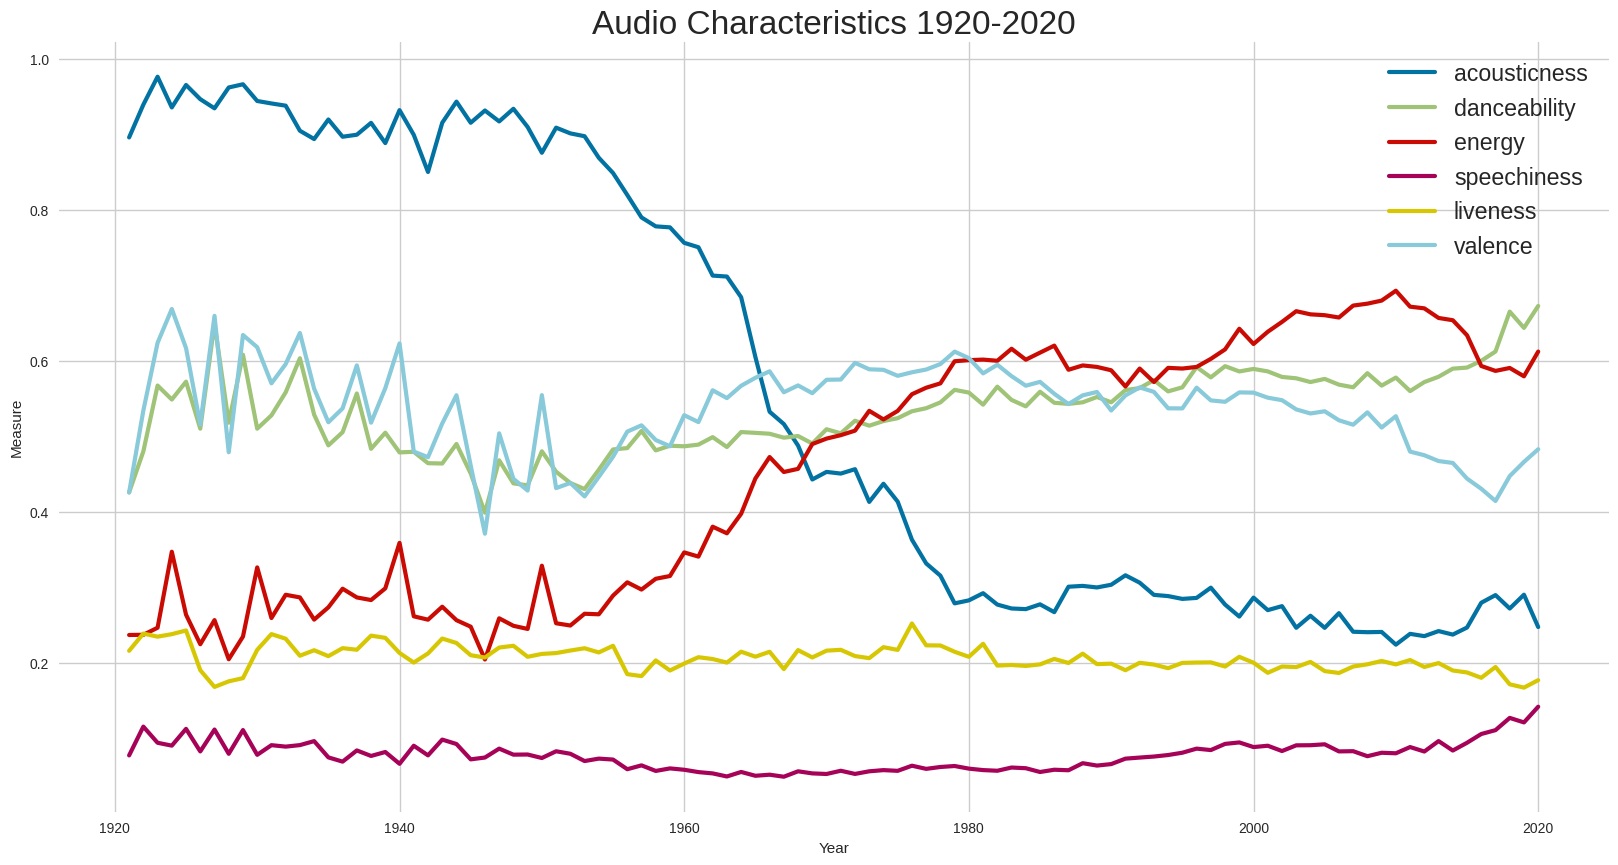

In [10]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x  = df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Audio Characteristics 1920-2020')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.legend(loc='upper right', shadow=True, fontsize='x-small')

- Before 1970, the most popular audio characteristics is acousticness
- After 1970, energy music is becoming more popular

### 2. Find Top 10 of artist between 2015-2020

In [11]:
top_10artist = df[(df['year'] >= 2015)&(df['popularity'] >= 75)].groupby('artists',as_index = False)['name'].count().sort_values(by = 'name',ascending = False).iloc[:10,:]['artists'].values.tolist()
top_10artist

['Billie Eilish',
 'Dua Lipa',
 'Bad Bunny',
 'Harry Styles',
 'The Weeknd',
 'XXXTENTACION',
 'Juice WRLD',
 'BTS',
 'Travis Scott',
 'Lil Uzi Vert']

### 3.Visualize overall data of Artist

In [12]:
def artist_overall(names):
    df_arts = df_artist[(df_artist['artists'] == names)]
    arts_genres = df_w_genres[(df_w_genres['artists'] == names)]['genres'].values[0]

    df_arts_char = df_arts[['artists','danceability','energy','liveness','loudness','speechiness','tempo','valence','key','mode','acousticness']]
    df_arts_char = df_arts_char.reset_index(drop = True)
    basement_median = df_artist[['danceability','energy','liveness','loudness','speechiness','tempo','valence','acousticness']].median()
    for column in ['danceability','energy','liveness','loudness','speechiness','tempo','valence','acousticness']:

        df_arts_char[column] = df_arts_char[column].apply(lambda x : (x/basement_median[column])*100)
    df_arts = df_arts_char.iloc[[0], :].T
    df_arts.columns = ['measure']
    df_arts['char'] = df_arts.index
    df_arts['song'] = df_arts.iloc[[0], [0]].values[0][0]
    df_arts = df_arts.iloc[1:,].reset_index(drop=True)

    fig = go.Figure(data=go.Scatterpolar(
      r=df_arts[(df_arts['char'] != 'mode') & (df_arts['char'] != 'key')]['measure'],
      theta=df_arts[(df_arts['char'] != 'model')]['char'],
      fill='toself'
    ))

    fig.update_layout(title = {"text":"Artist :"+names  + " ,Genres :" + arts_genres} ,
      polar=dict(
        radialaxis=dict(
          visible=True
        ),
      ),
      showlegend=False
    )

    fig.show()

In [13]:
top_10artist = df[(df['year'] >= 2015) & (df['popularity'] >= 75)].groupby('artists',as_index = False)['name'].count().sort_values(by = 'name',ascending = False).iloc[:10,:]
top_10artist['artists'] = top_10artist['artists'].str.replace('[','',regex = True)
top_10artist['artists'] = top_10artist['artists'].str.replace(']','',regex = True)
top_10artist['artists'] = top_10artist['artists'].str.replace("'",'',regex = True)
top_10artist = top_10artist['artists'].values.tolist()
for i in top_10artist:
    artist_overall(i)

### Conclusion from graph:
- Most artists have the same audio characteristics and bias for speechiness
- BTS is the only K-pop group that has made it to the popular artist list

### 4. Find correlation between interesting audio characteristics

In [14]:
df_audio_char = df[['id','danceability','energy','key','loudness','liveness','mode','speechiness','acousticness','instrumentalness',
                  'popularity','duration_ms','valence','tempo']]
df_audio_char = df_audio_char.set_index('id')

<Axes: >

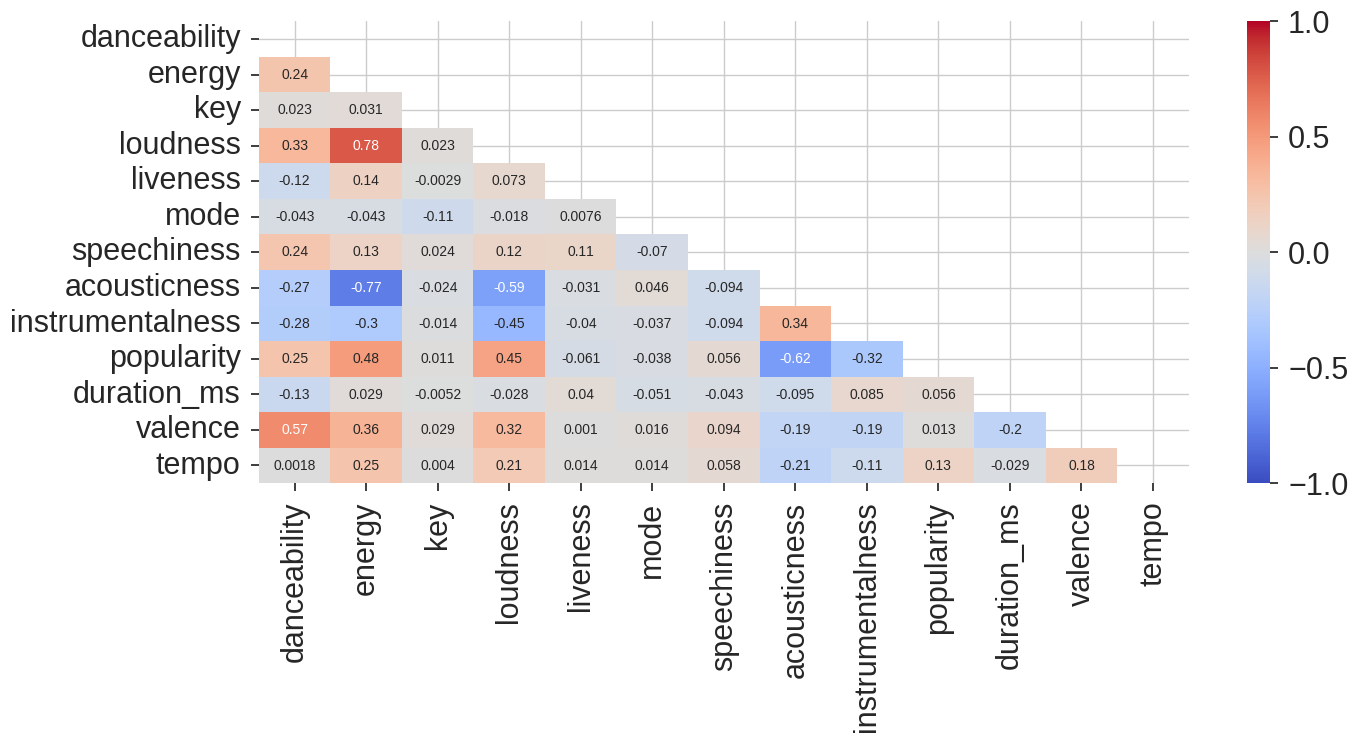

In [15]:
f, ax = plt.subplots(figsize=(15, 6))
corr = df_audio_char.corr()
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap
sns.heatmap(corr, annot=True,  cmap="coolwarm", mask = mask, annot_kws={"size": 10}, vmin=-1, vmax=1)

### Positive correlation
- Loudness & Energy: 0.78
- Valence & Danceability: 0.57

### Negative correlation

- Energy & Acousticness: -0.77
- Loudness & Acousticness: -0.59

[Text(0.5, 1.0, 'Energy vs Loudness')]

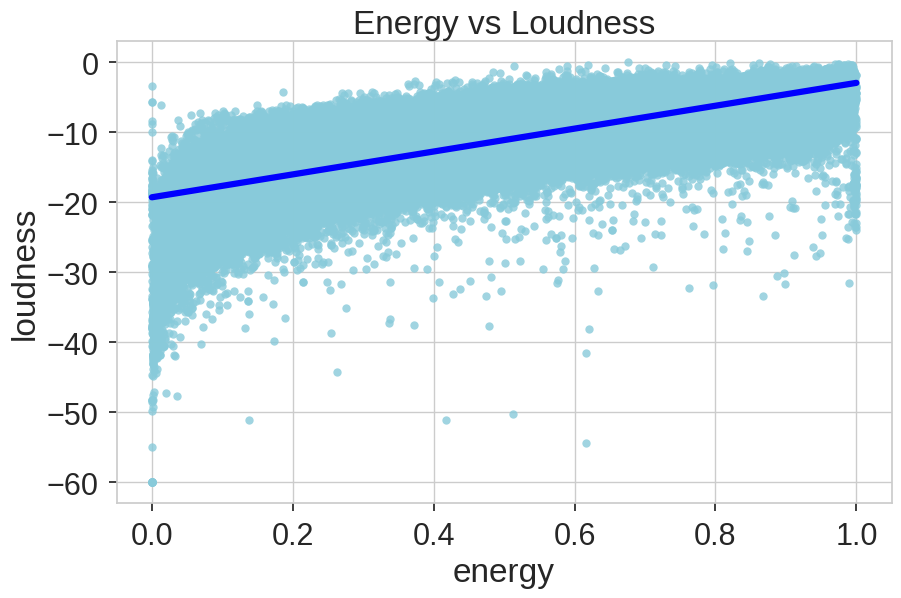

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_audio_char, x = "energy", y= "loudness", color = "c",line_kws = {"color": "blue"}).set(title="Energy vs Loudness")

[Text(0.5, 1.0, 'Acousticness vs Energy')]

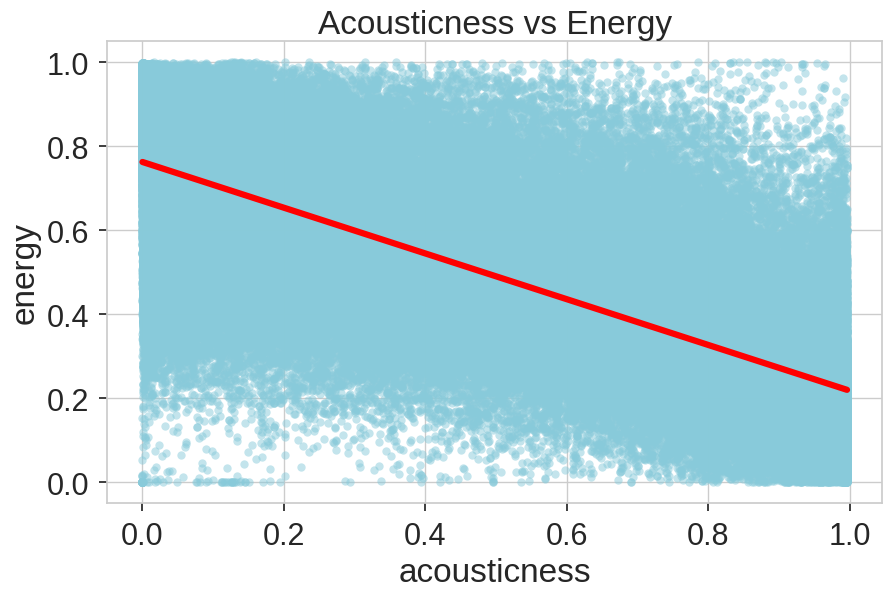

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_audio_char, x= "acousticness", y = "energy",
            scatter_kws = {"color": "c", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99).set(title="Acousticness vs Energy")

### 5. Find song popularity timeline by artist

In [18]:
def arts_popular_song(data_song_title:str):
    df_blck = df[(df['artists'] == data_song_title)]

    df_blck = df_blck.sort_values(by = 'year',ascending = True)
    df_blck['song_n_year'] =  df_blck['year'].astype(str) +'_'+ df_blck['name']

    plt.subplots(figsize = (15,5))
    a_plot = sns.lineplot(data = df_blck,
        x="song_n_year",
        y="popularity",
        marker='o'
    )
    a_plot.set(ylim=(50,95))
    plt.xticks(rotation=90, fontsize=8)
    plt.title(data_song_title + ' Song and Timeline Popularity')

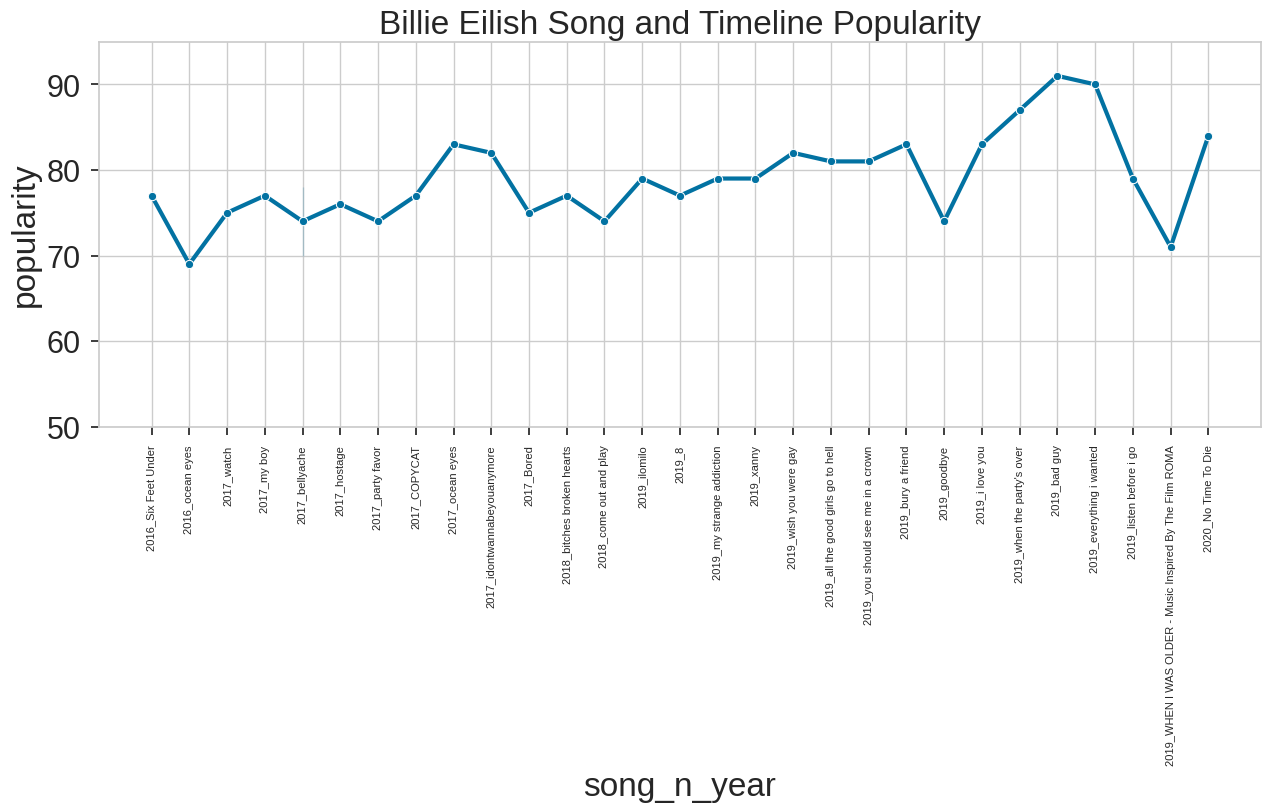

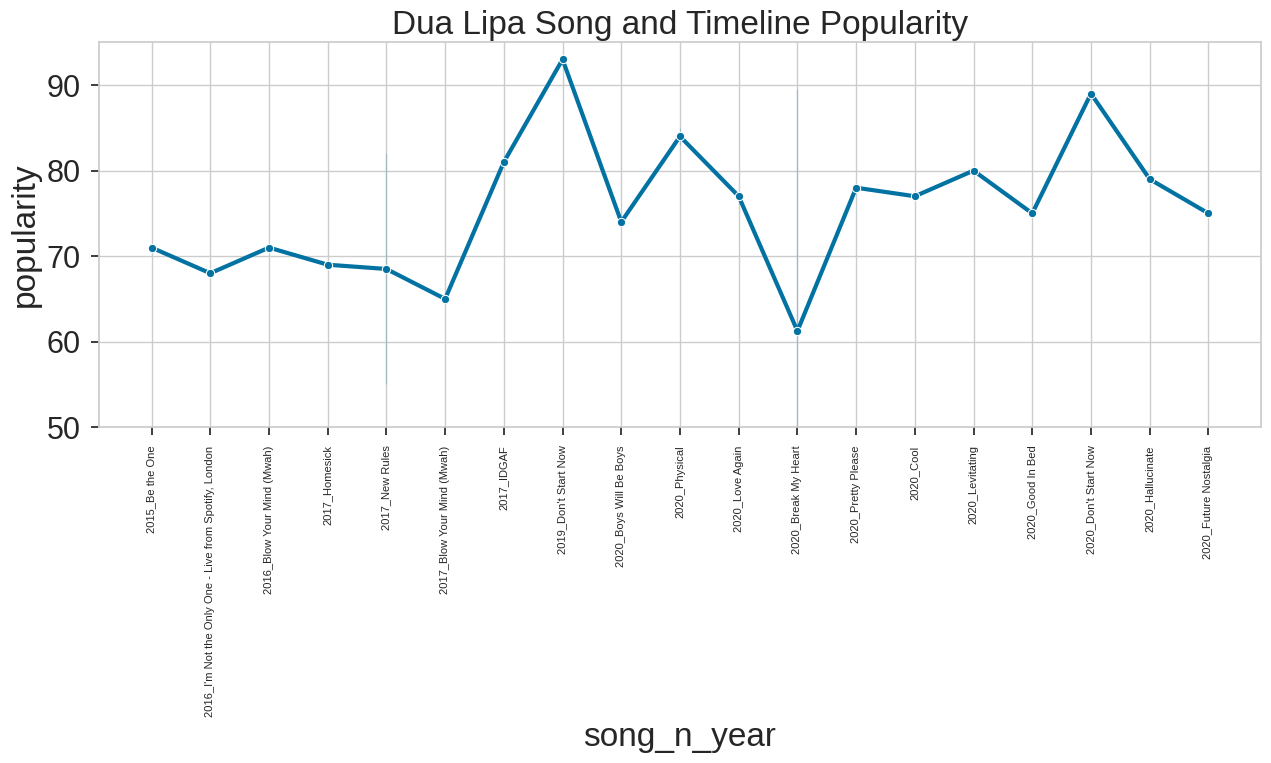

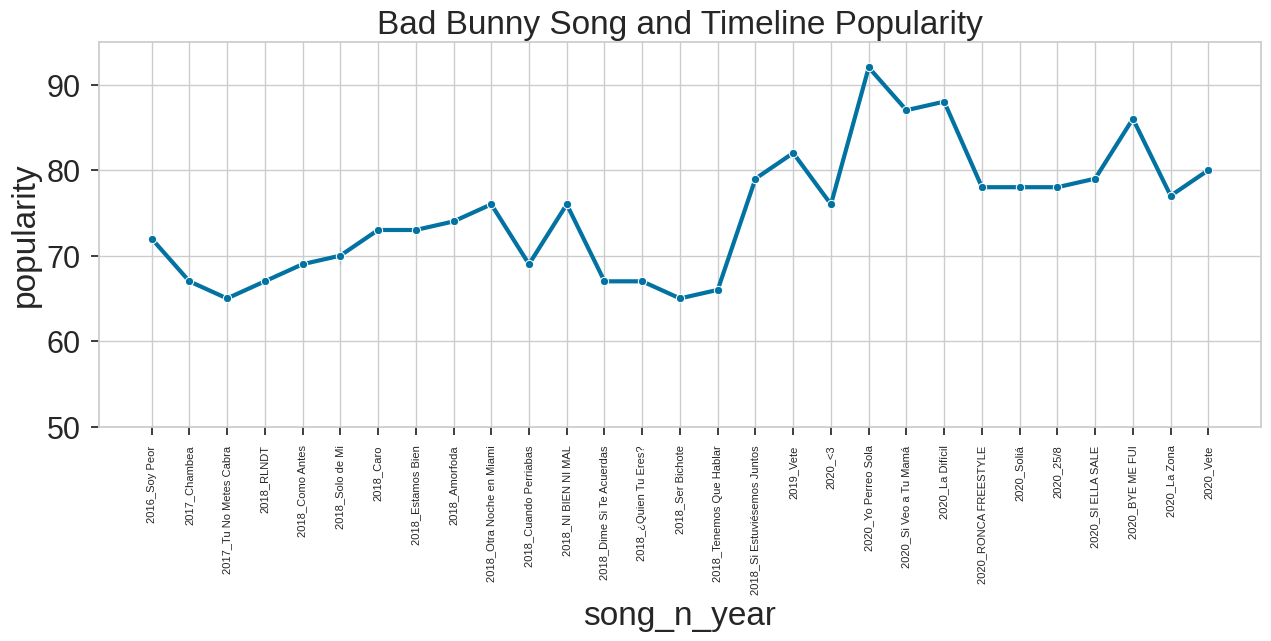

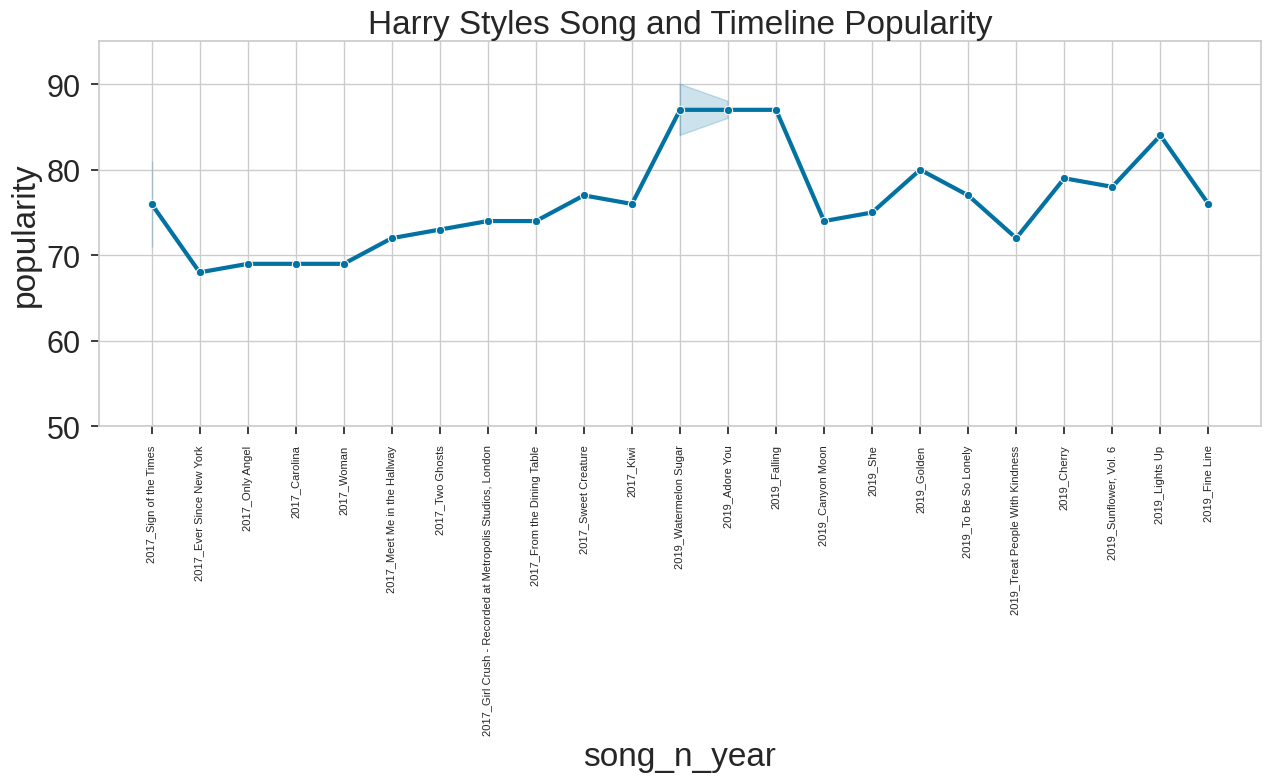

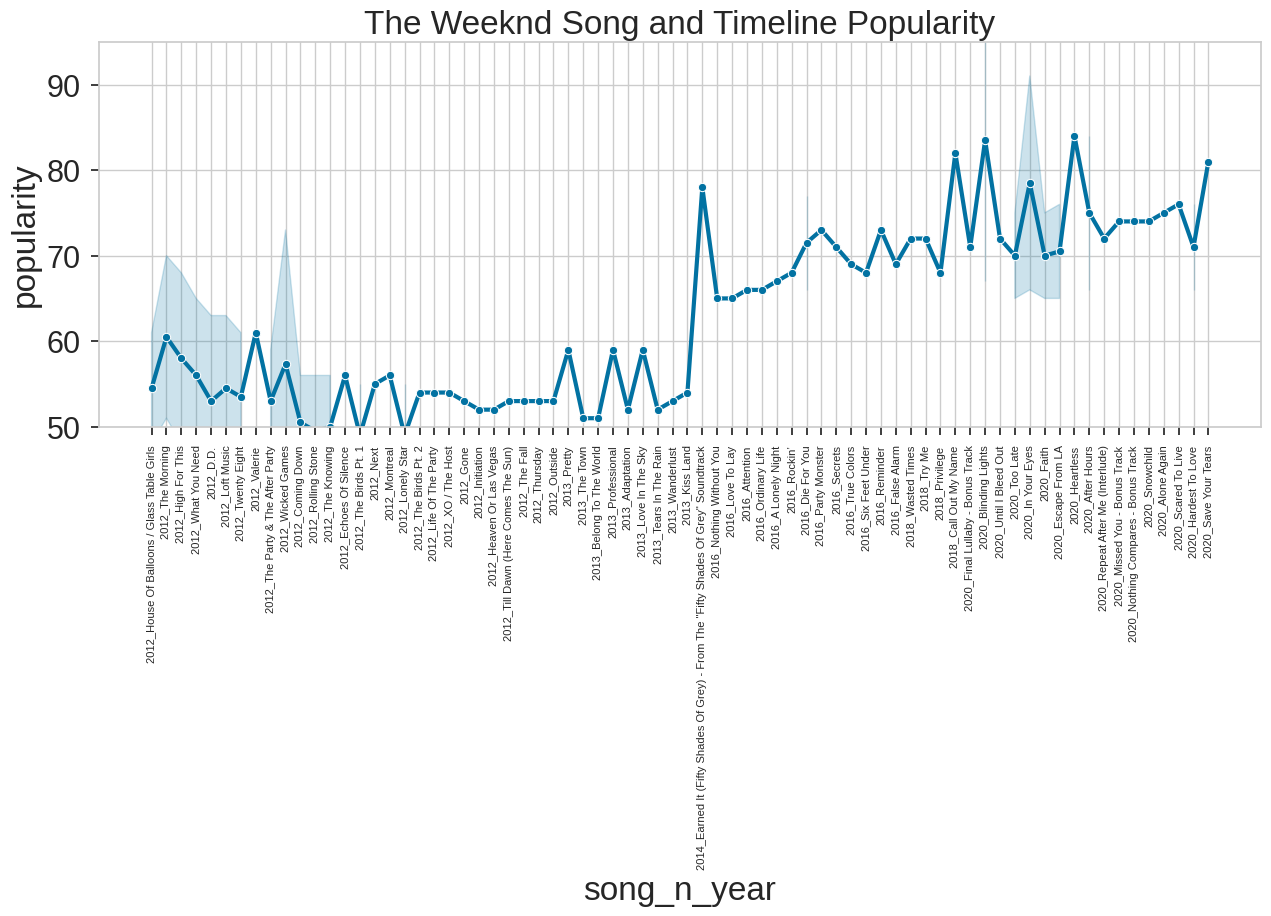

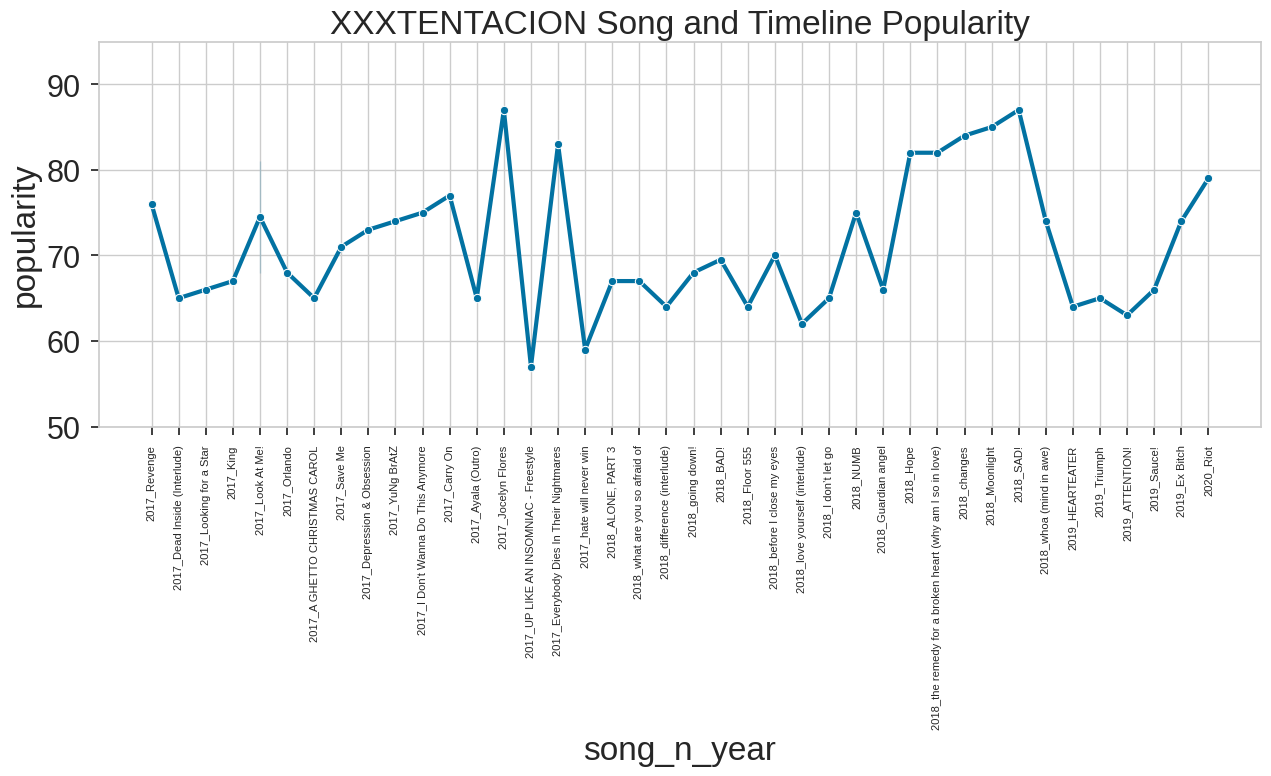

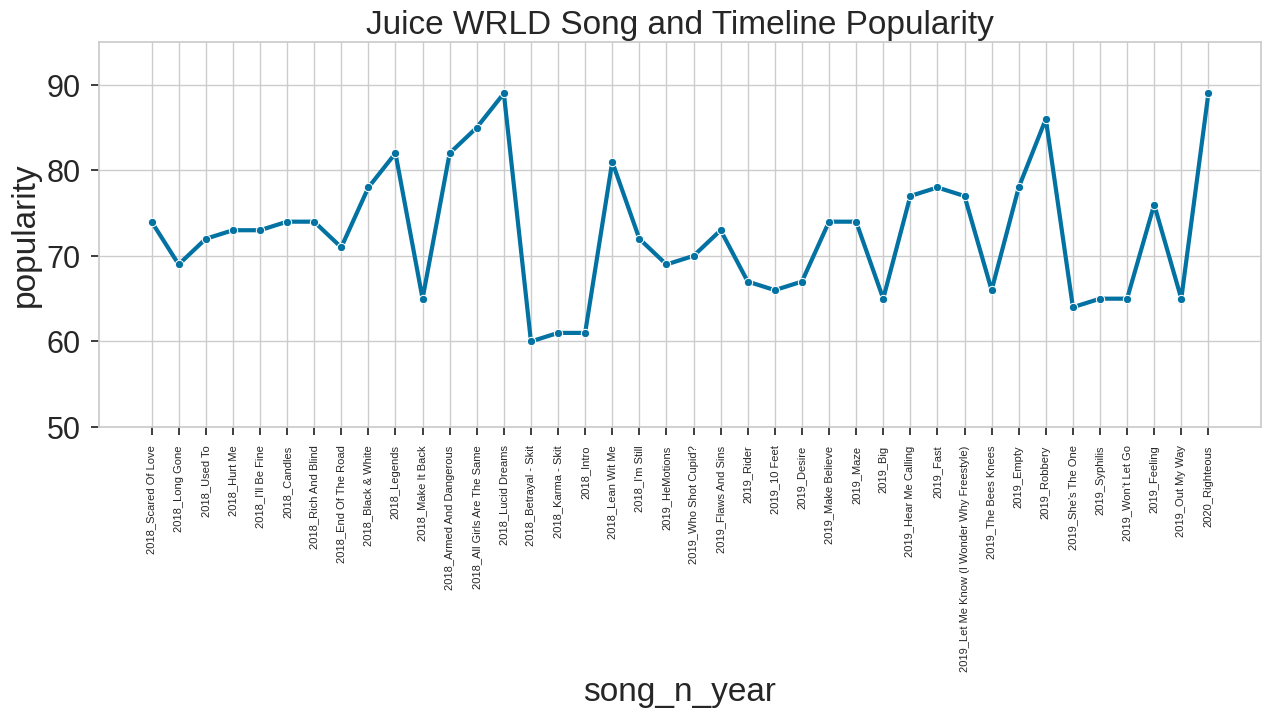

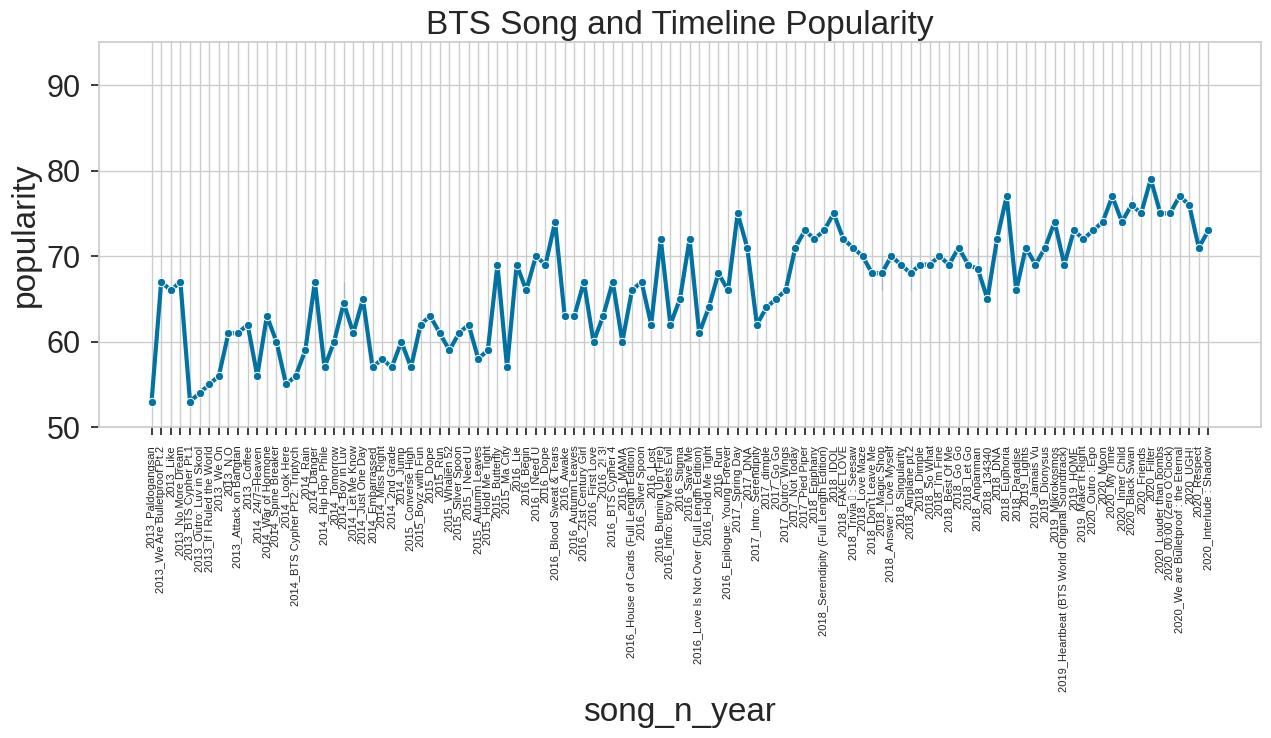

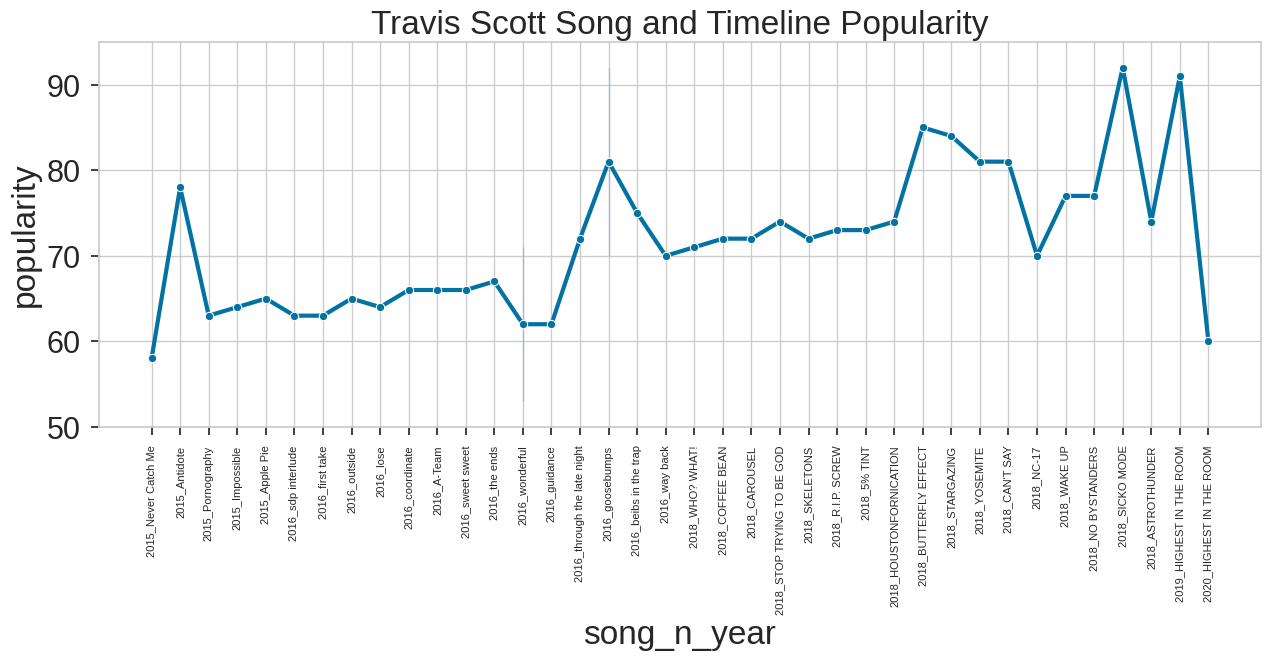

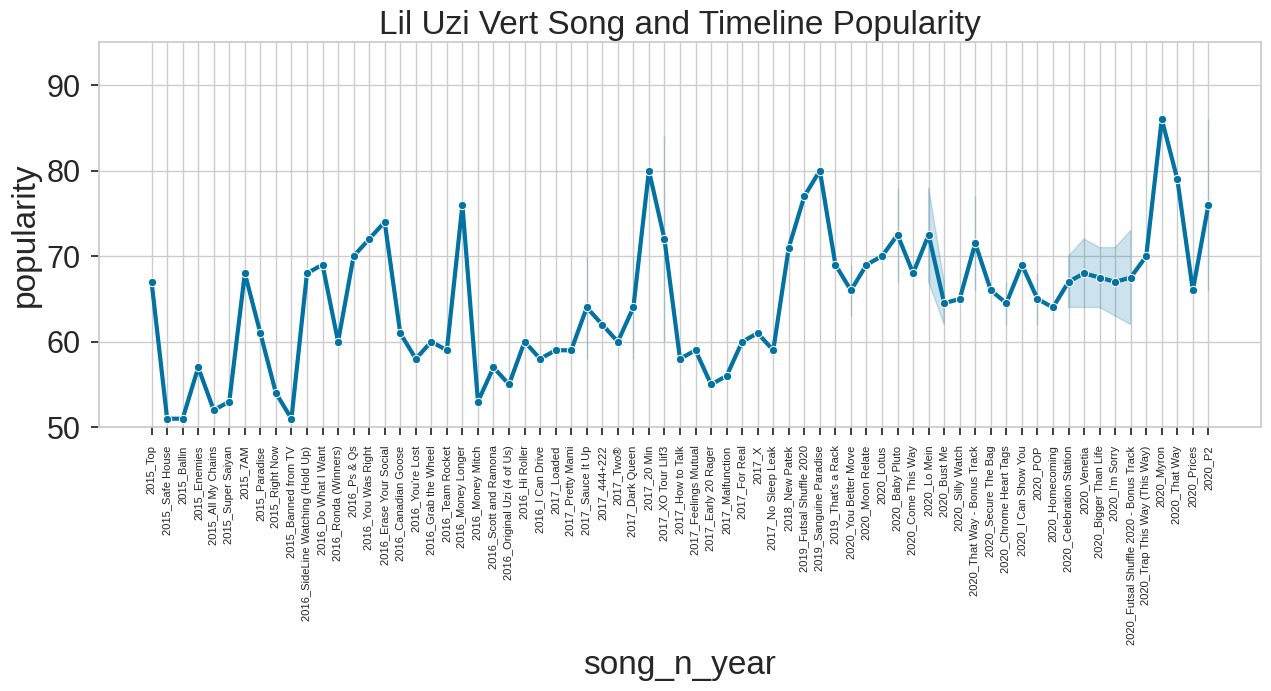

In [19]:
for i in top_10artist:
    arts_popular_song(i)

### 6. Find characteristics songs of artist

In [20]:
def top_song_charac(data_song_title:str):
    df_arts = df[df['artists'] == data_song_title]
    df_arts_char = df_arts[['name','danceability','energy','liveness','loudness','speechiness','tempo','valence','year','popularity','acousticness']].sort_values(by='popularity', ascending =False)
    df_arts_char = df_arts_char.reset_index(drop = True)
    basement_median = df[df['popularity'] != 0][['danceability','energy','liveness','loudness','speechiness','tempo','valence','acousticness']].median()
    for column in ['danceability','energy','liveness','loudness','speechiness','valence','acousticness']:
        df_arts_char[column] = df_arts_char[column].apply(lambda x : (x/basement_median[column])*100)
    df_atrs_top5 = pd.DataFrame()
    for i in range(5):
        df_arts = df_arts_char.iloc[[i], :].T
        df_arts.columns = ['measure']
        df_arts['char'] = df_arts.index
        df_arts['song'] = df_arts.iloc[[0], [0]].values[0][0]
        df_arts = df_arts.iloc[1:,].reset_index(drop=True)
        df_atrs_top5 = pd.concat([df_atrs_top5,df_arts],axis = 0)

    sns.set_style("whitegrid")
    fig,ax = plt.subplots(figsize=(20, 10))
    sns.set_style("whitegrid")
    sns.barplot(y="measure",x = "song",hue='char', data=df_atrs_top5[(df_atrs_top5['char'] != 'year') & (df_atrs_top5['char'] != 'popularity')])
    ax.set(xlabel = None, ylabel = 'Indexing')
    ax.legend(loc='best', shadow=True, fontsize='x-small')
    ax.set_title(data_song_title+' TOP 5 CHARASTERISTICS', fontsize = 20)

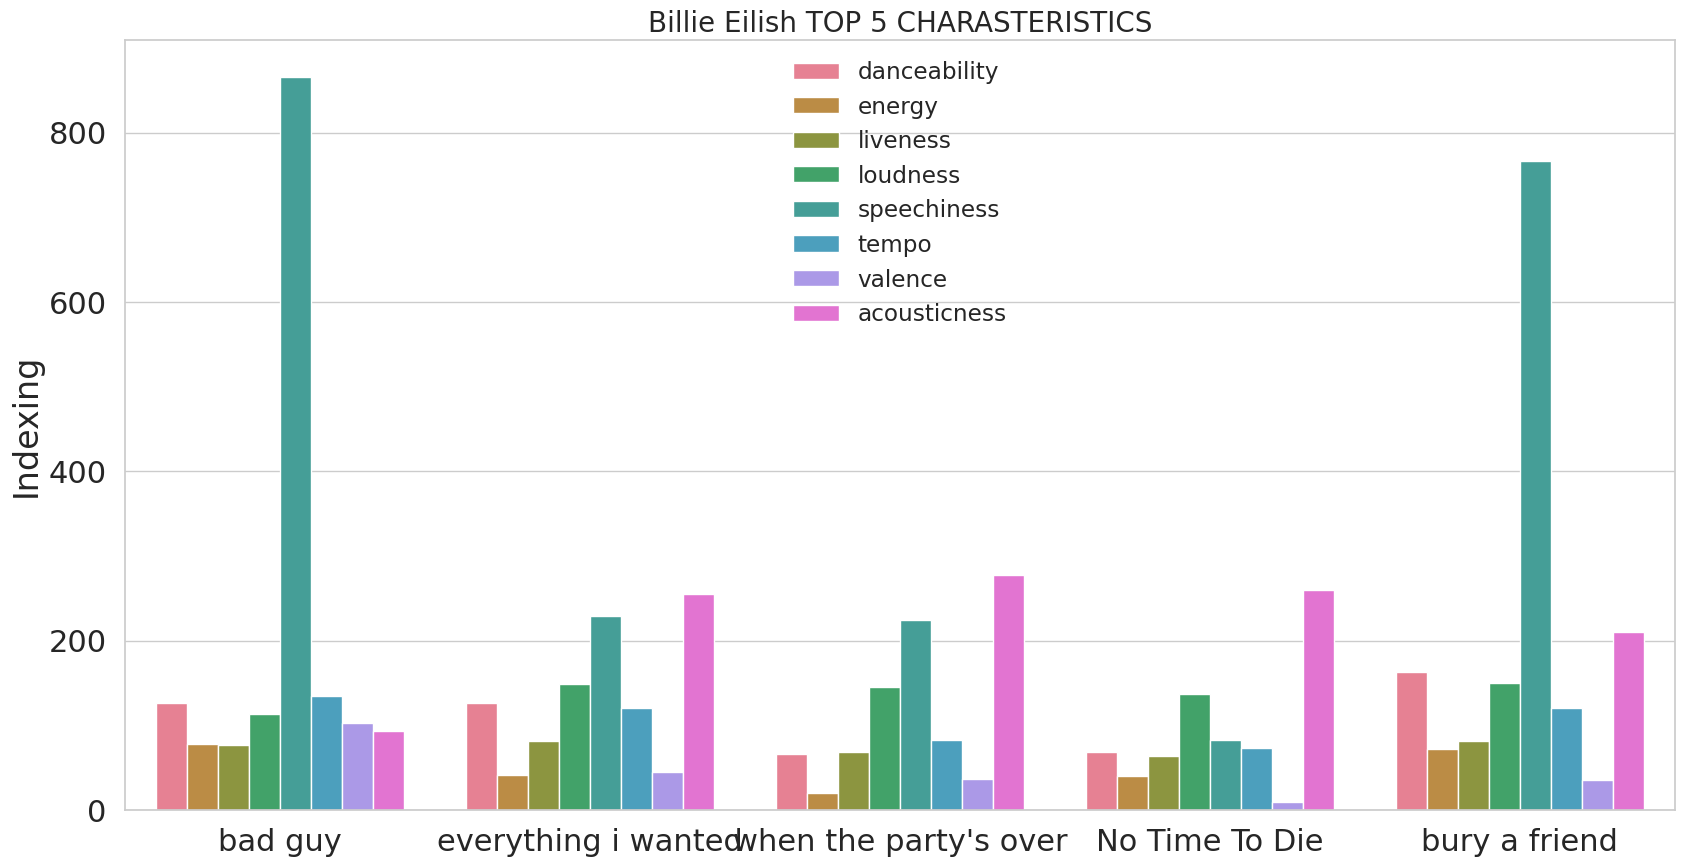

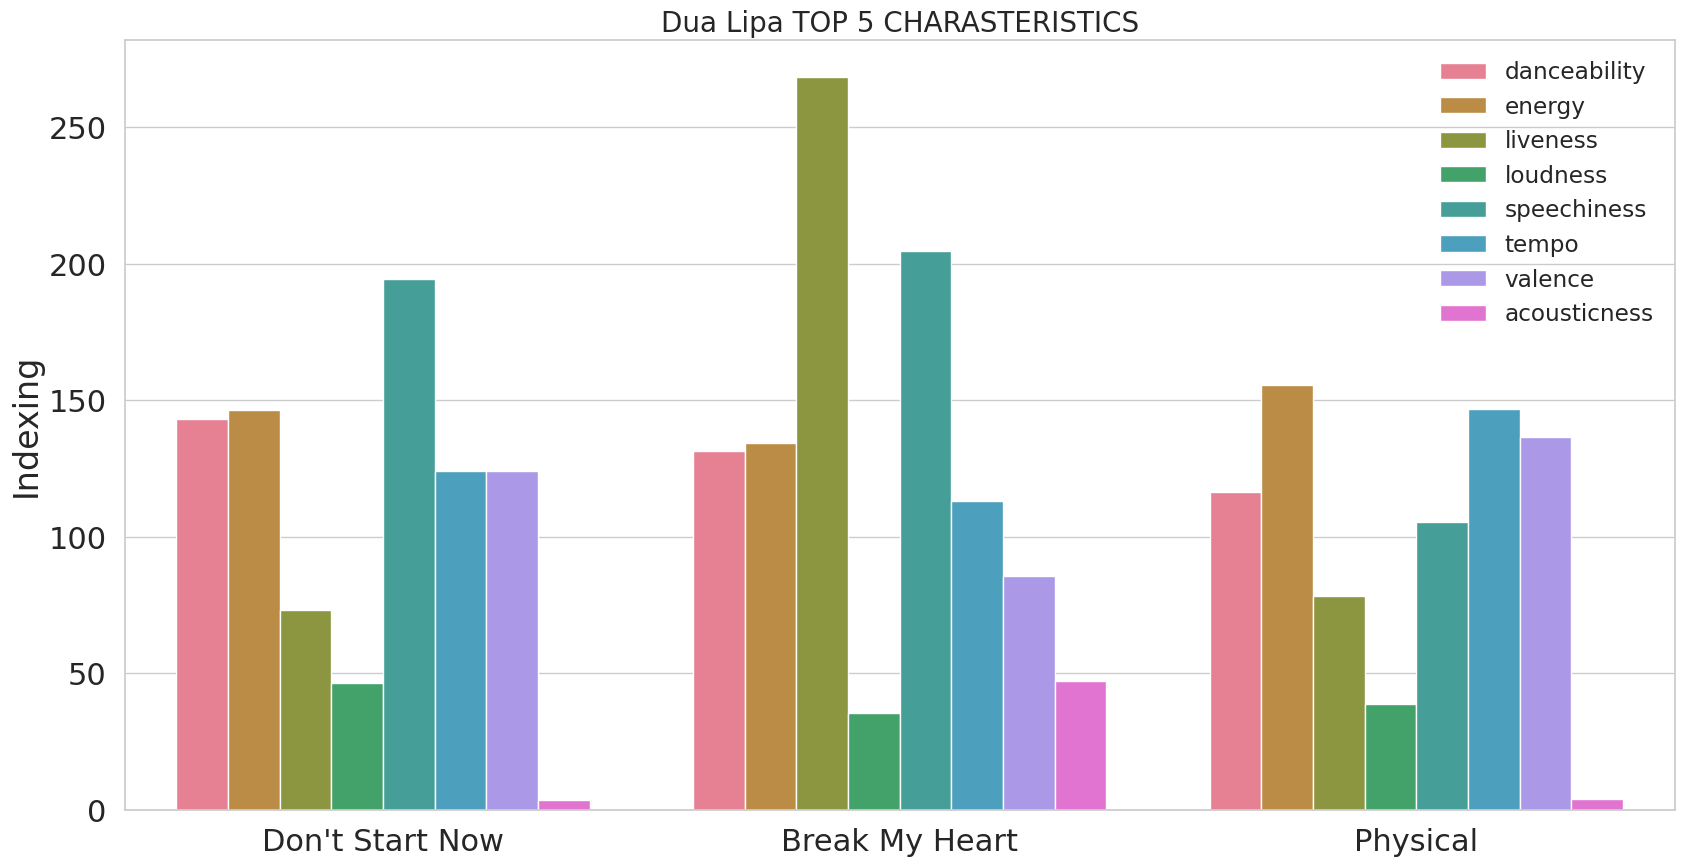

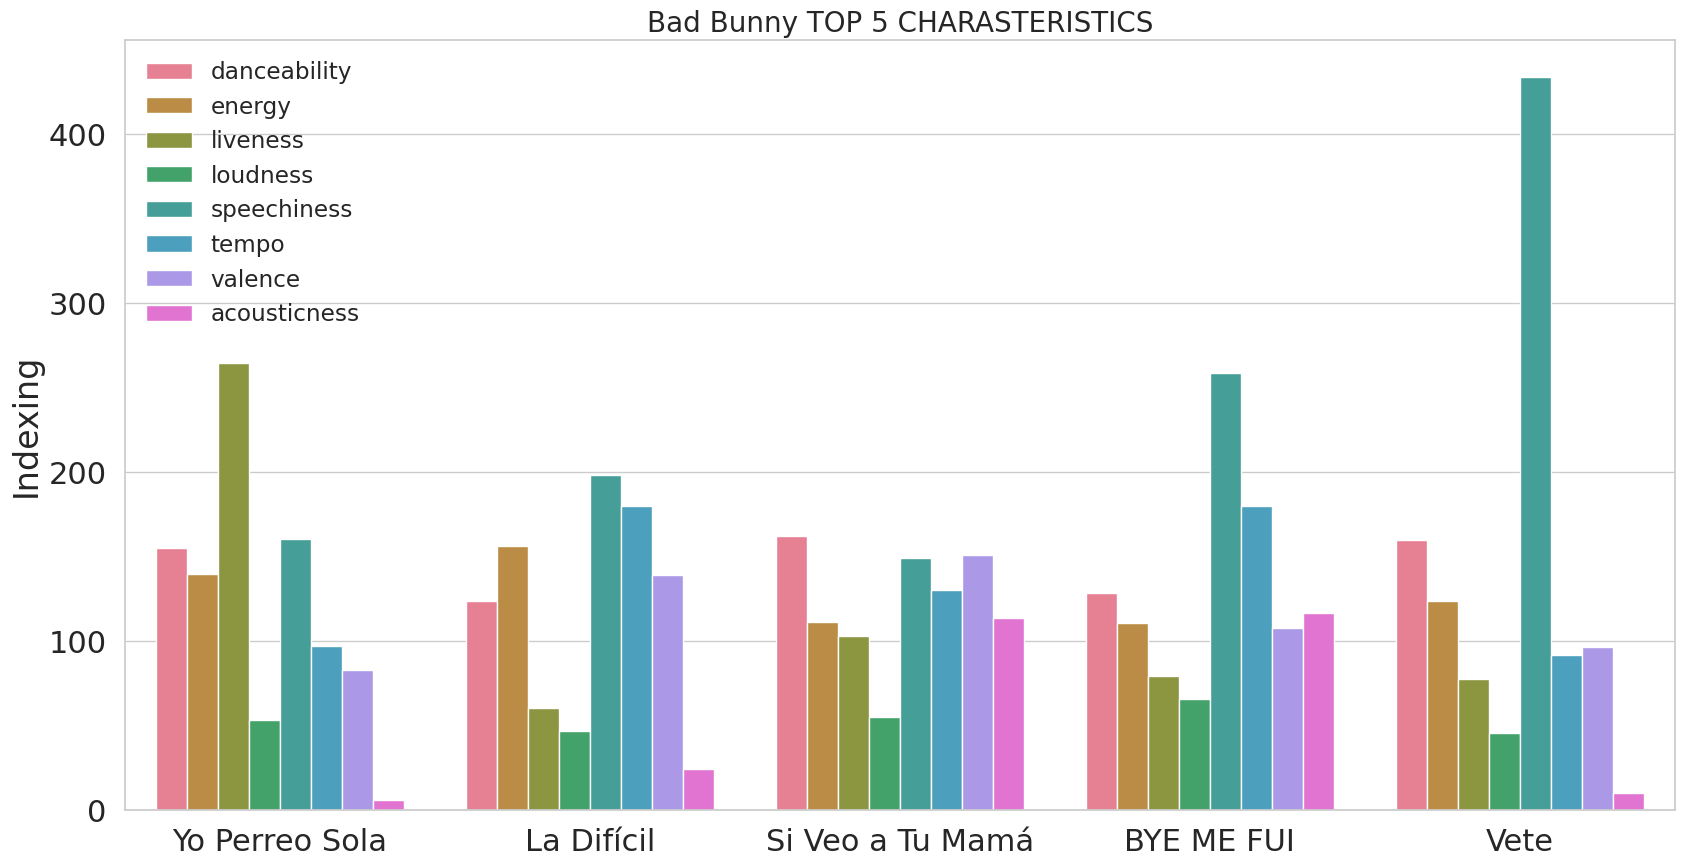

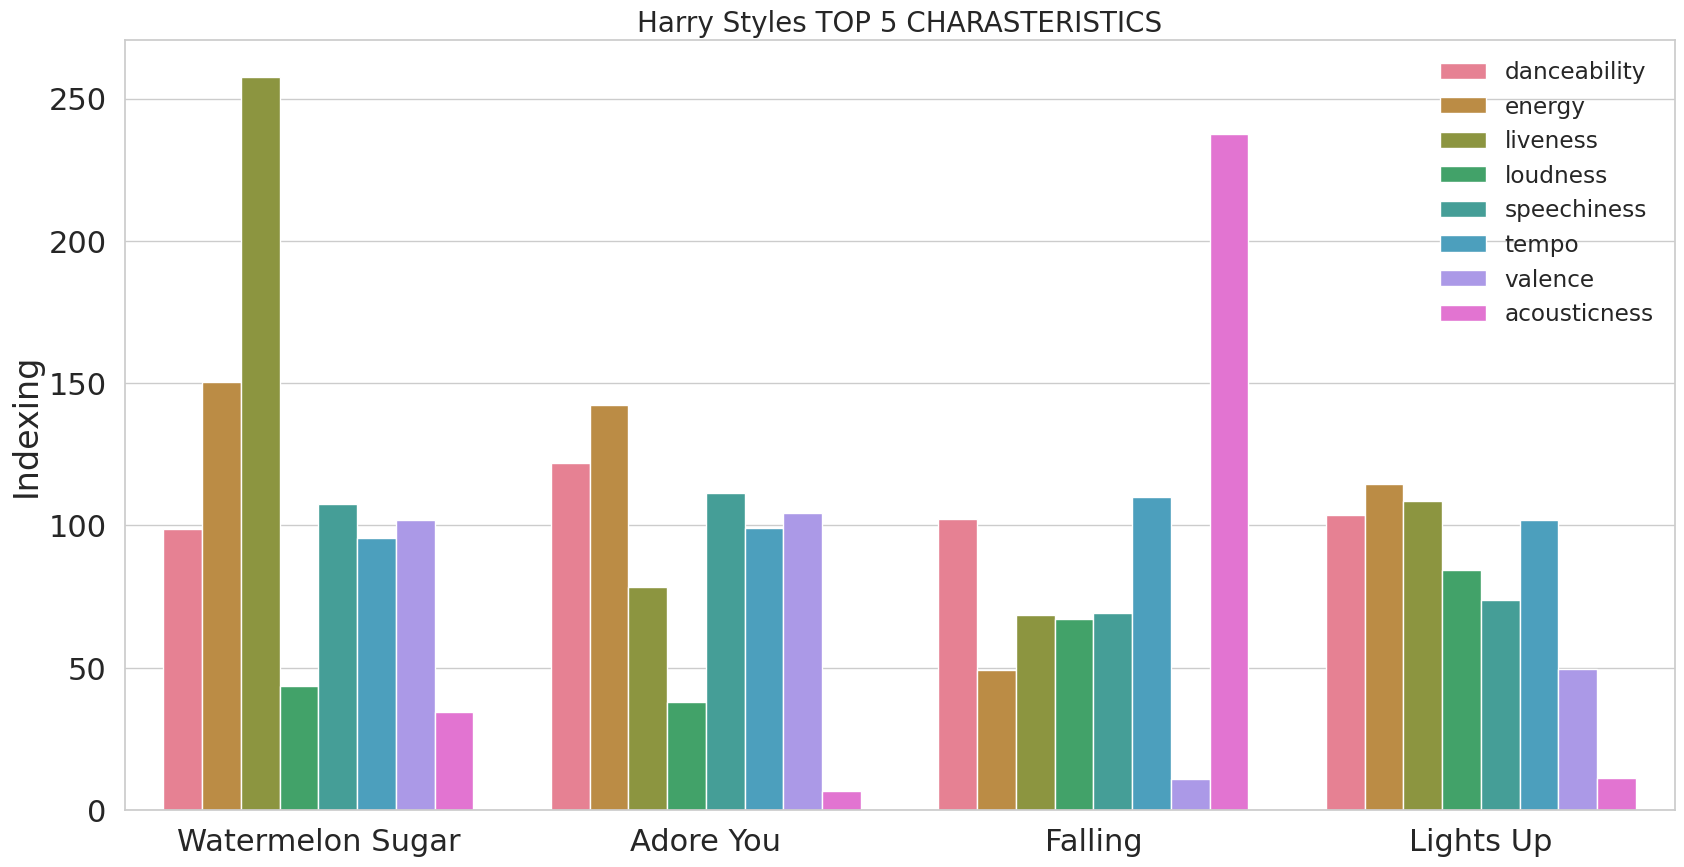

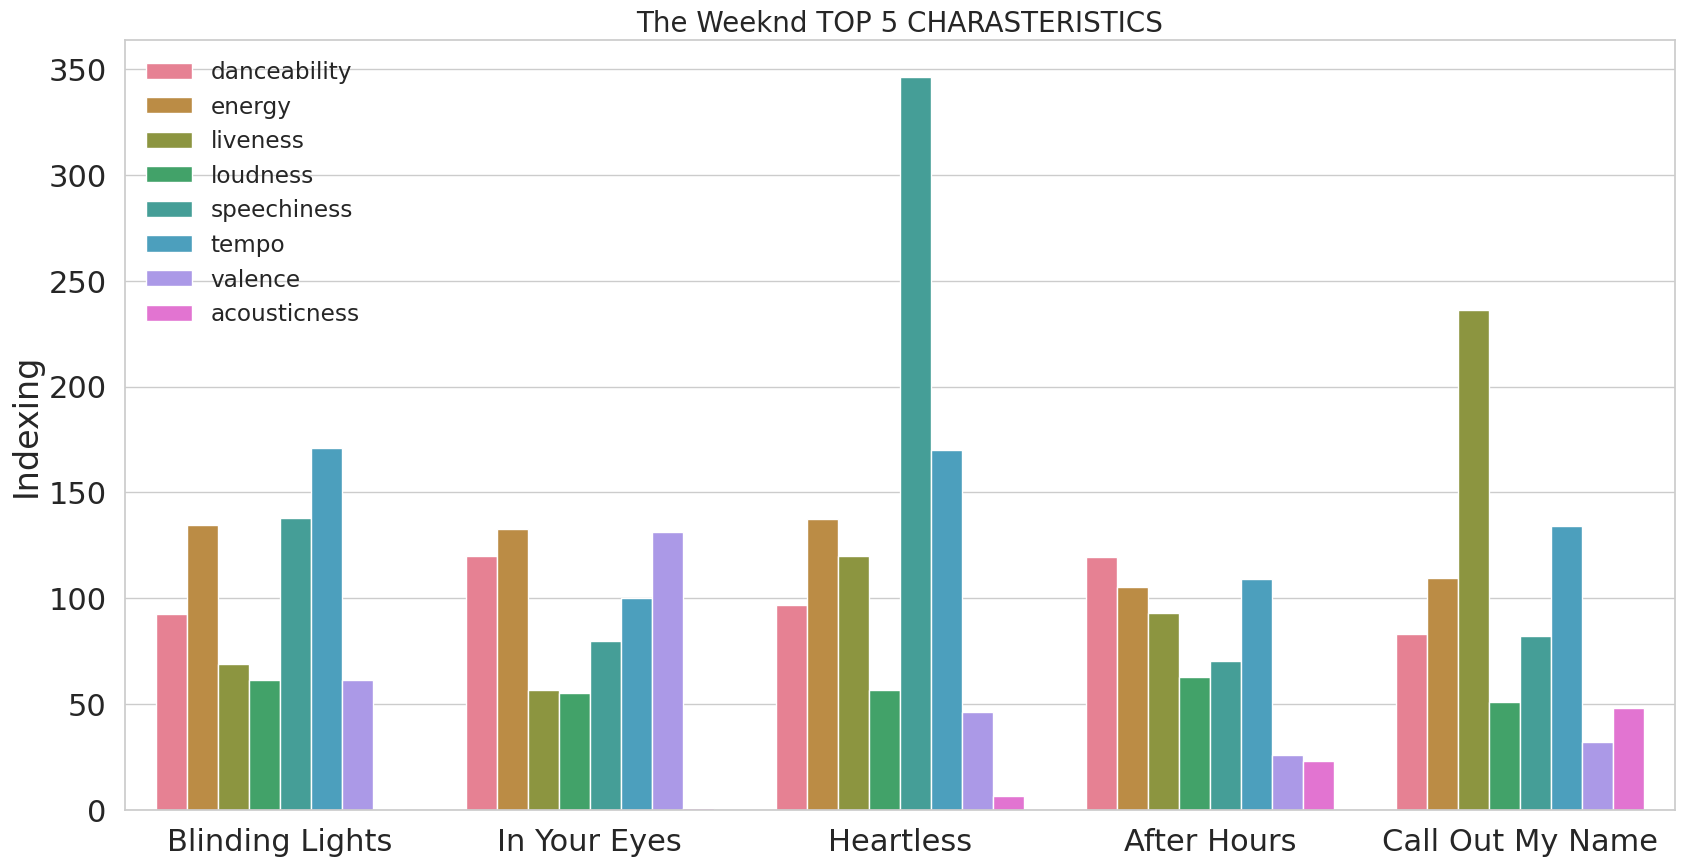

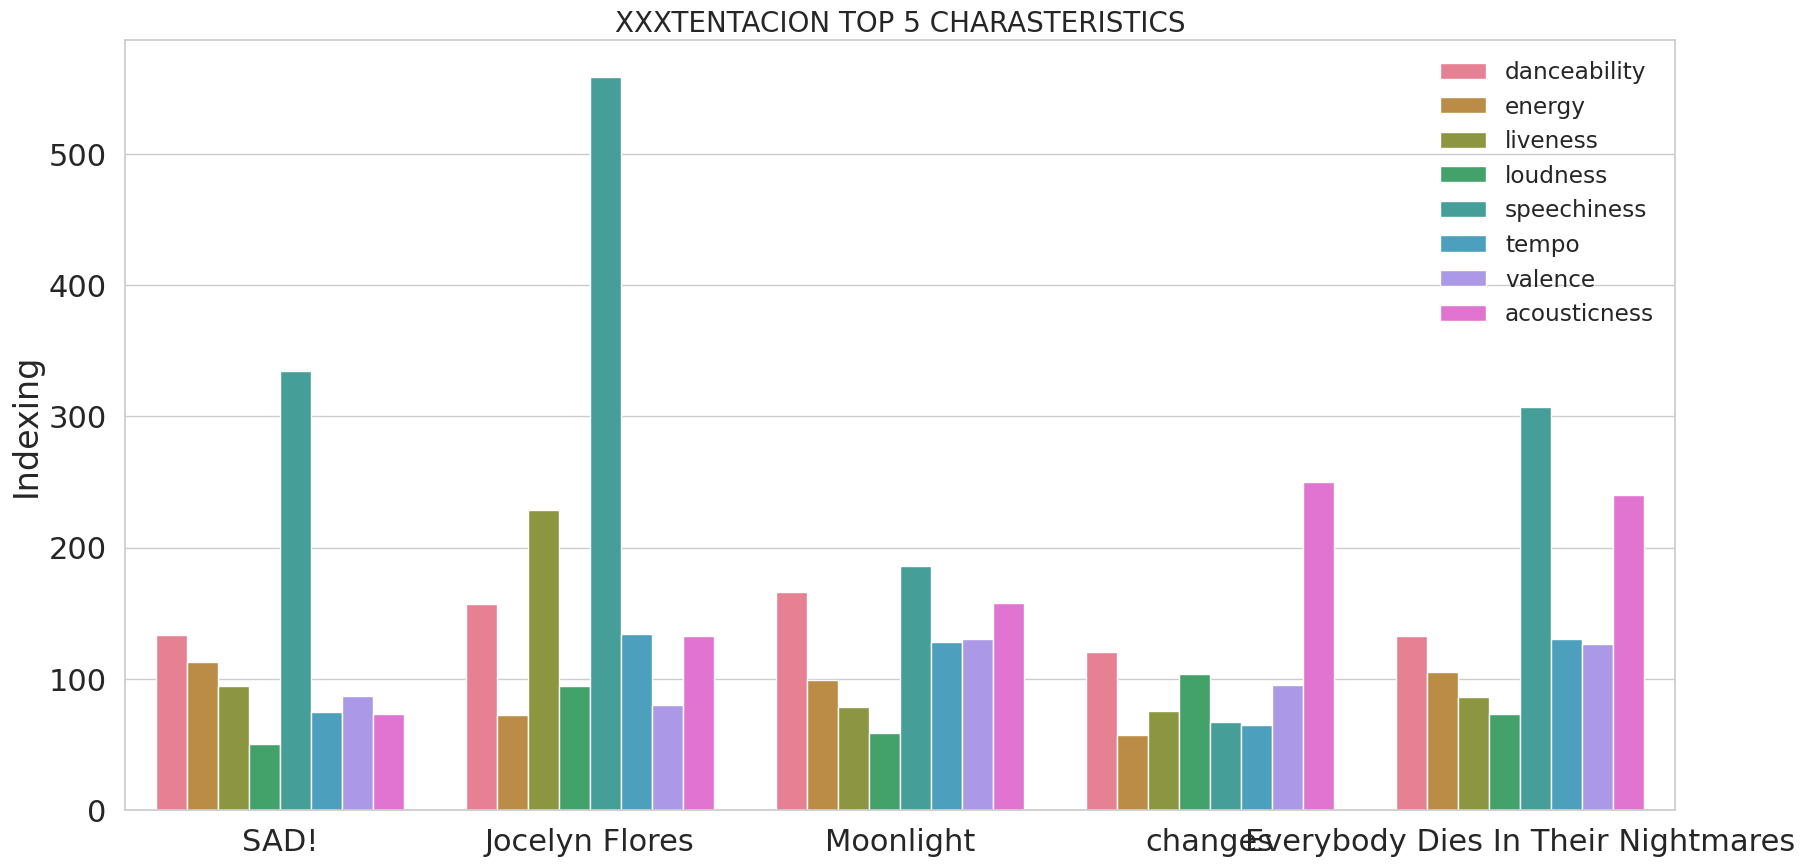

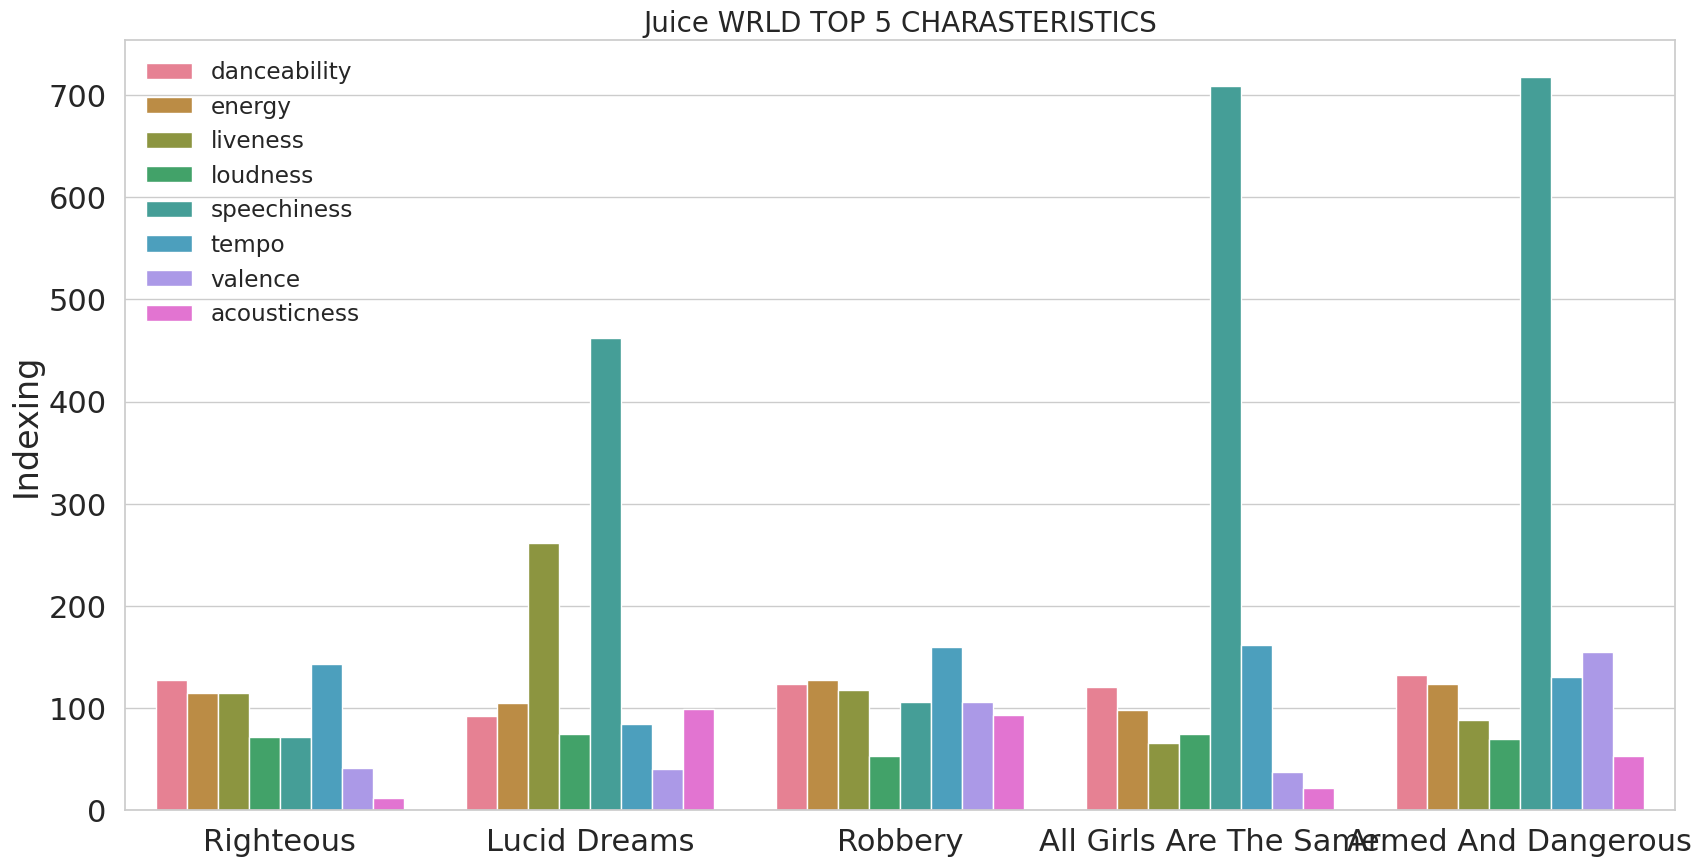

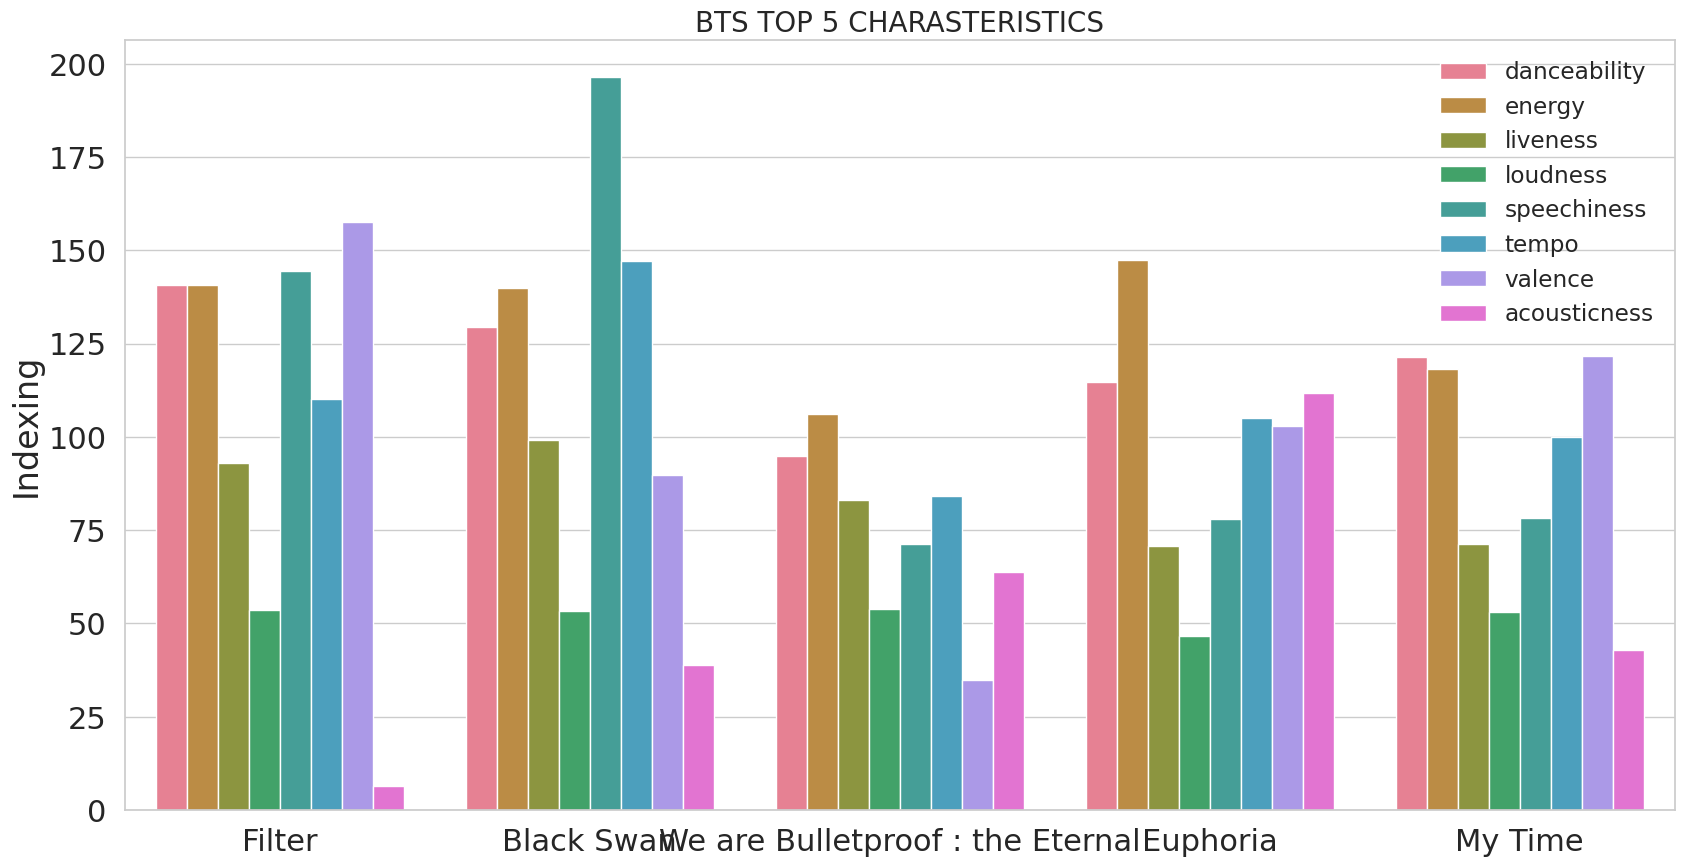

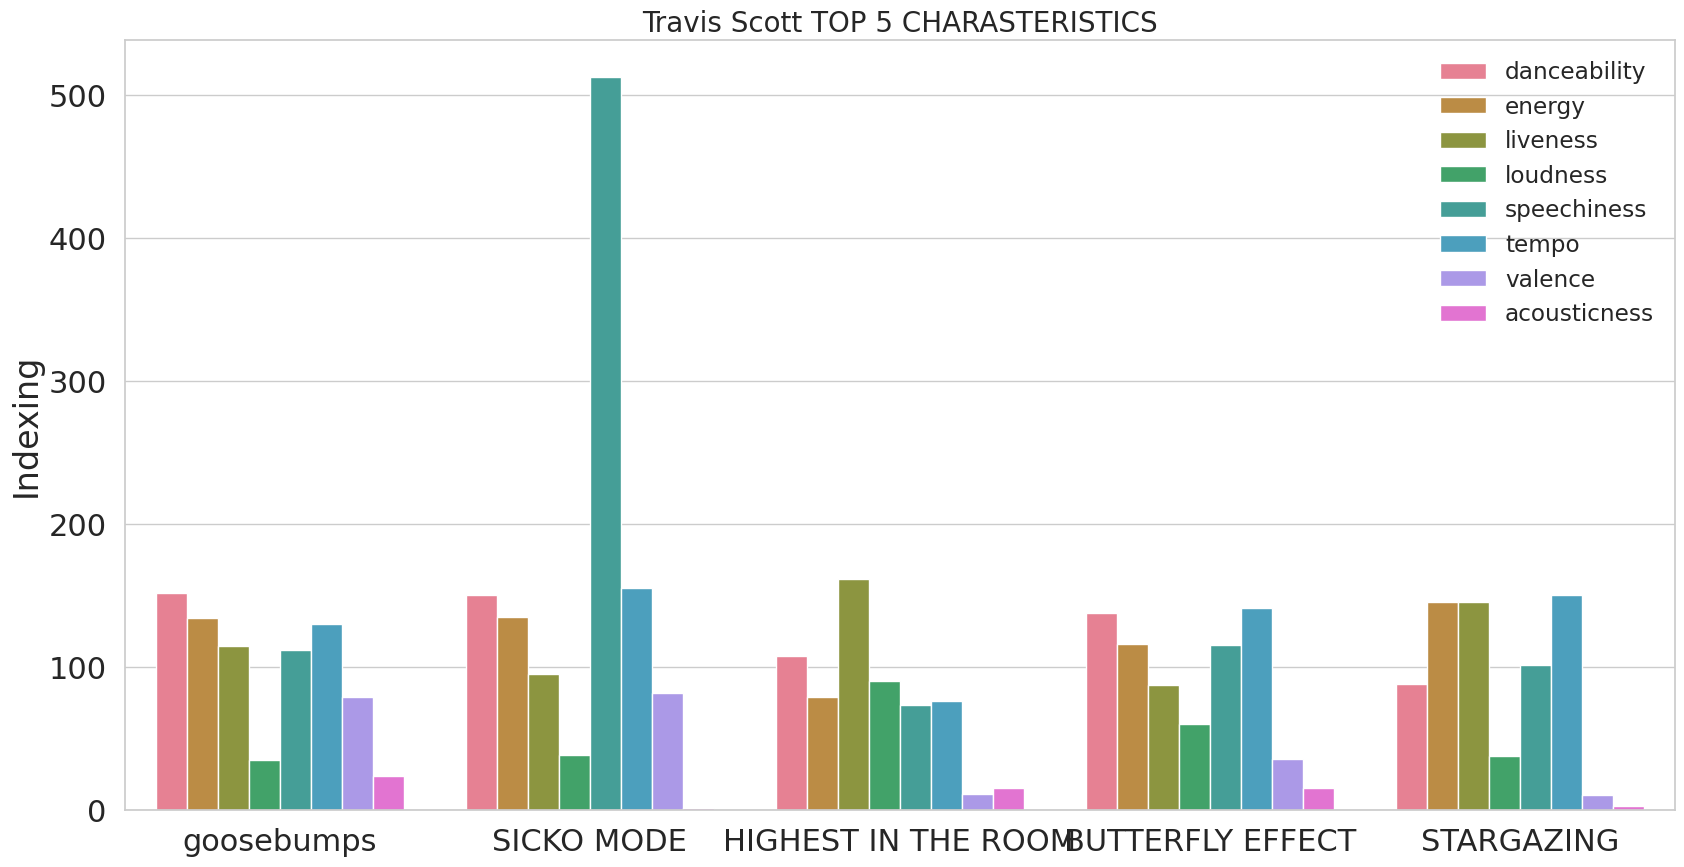

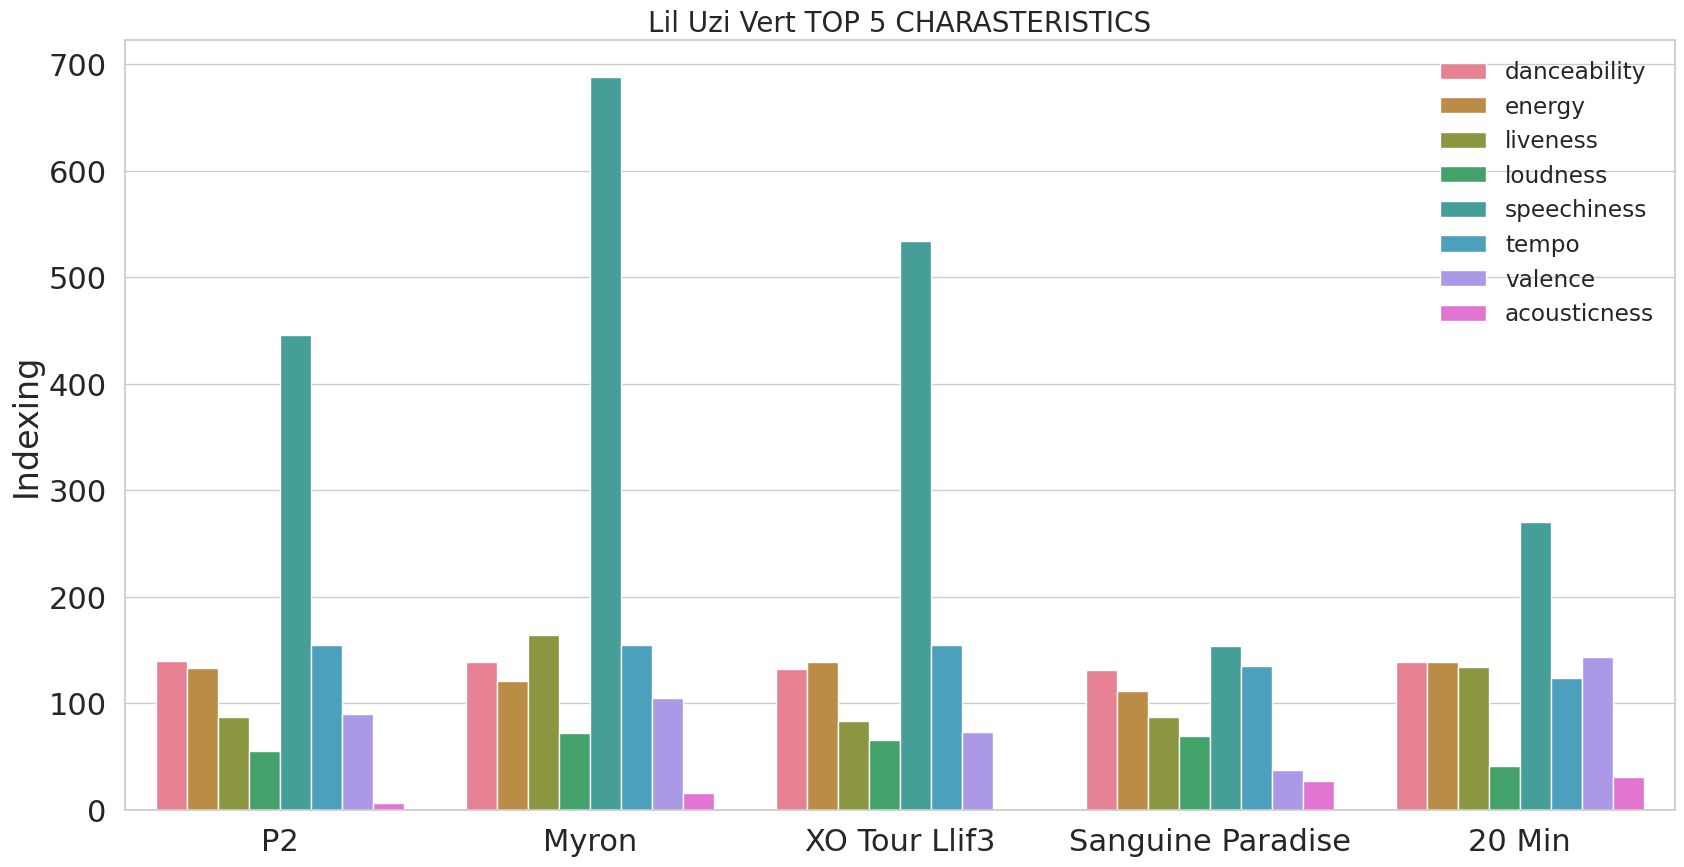

In [21]:
for i in top_10artist:
    top_song_charac(i)